# Solution: Calibration and parameter uncertainty

## Model calibration

In [2]:
# CELL 1: READ IN THE DATASET AND SAVE IT INTO A VARIABLE CALLED "data"
data <- read.csv("../GraphicsAndData/w6_nb3_data.csv")  # load the dataset
print(data)                                # have a look at the content: one column called days and one called number infected  

  days number_infected
1    3               2
2    7              30
3   10             106
4   12             311
5   13             278
6   14             323
7   16             439


Loading required package: deSolve
Loading required package: reshape2
Loading required package: ggplot2


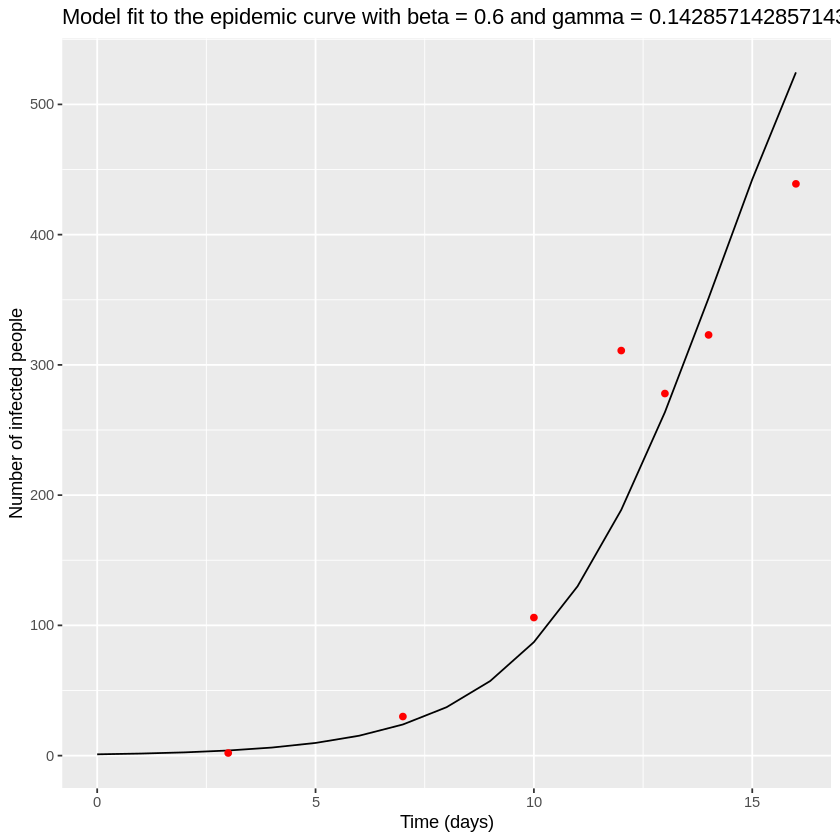

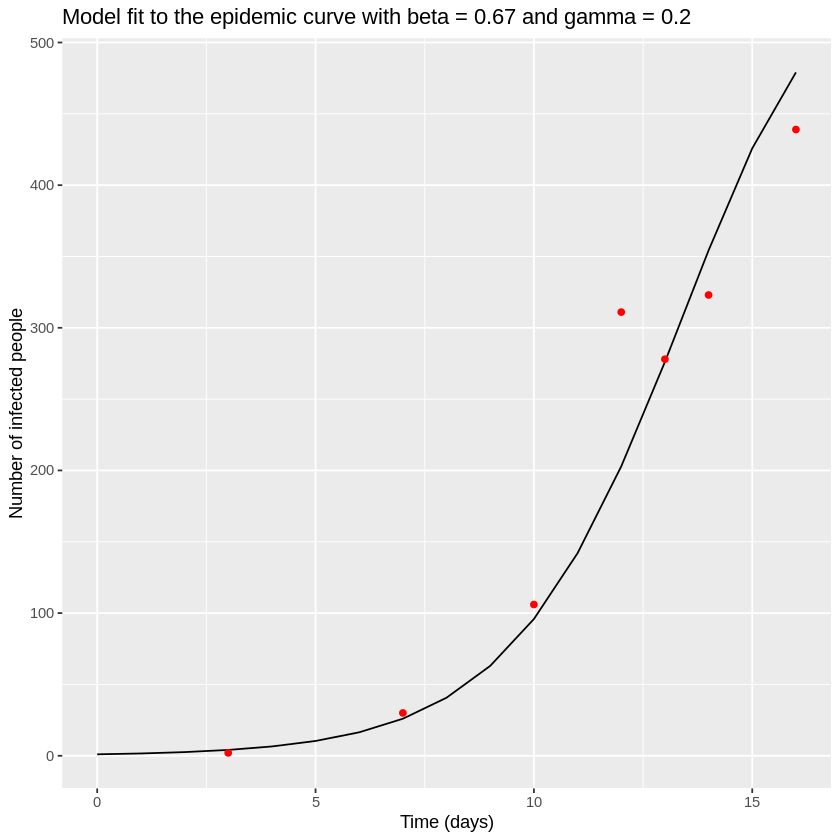

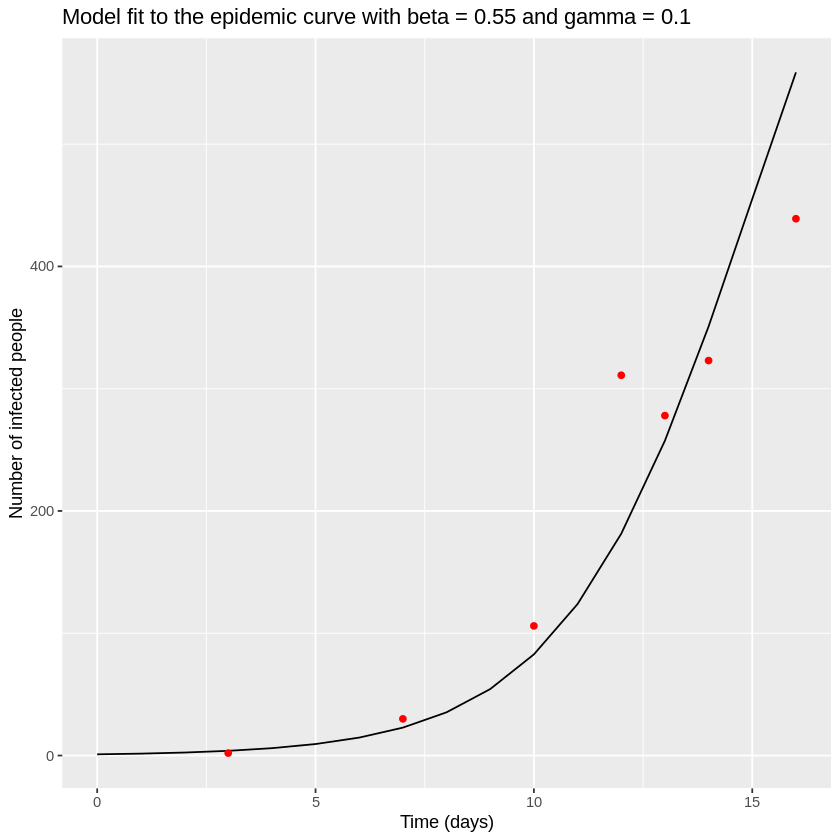

In [2]:
# CELL 2: CALIBRATE THE MODEL

# PACKAGES
require(deSolve)
require(reshape2)
require(ggplot2)

# INPUT
initial_state_values <- c(S = 1500,  
                          I = 1,       
                          R = 0)

times <- seq(from = 0, to = 16, by = 1)  # the last datapoint is from 16 days after the start of the epidemic

# MODEL FUNCTION
sir_model <- function(time, state, parameters) {  
  
  with(as.list(c(state, parameters)), {
    
    N <- S+I+R
    
    lambda <- beta * I/N
    
    # The differential equations
    dS <- -lambda * S               
    dI <- lambda * S - gamma * I
    dR <- gamma * I             
    
    # Output
    return(list(c(dS, dI, dR))) 
  })
}
    
# Assuming gamma = 1/7 per day
                 
parameters1 <- c(beta = 0.6,  # vary beta to obtain the best visual fit using the plot below
                gamma = 1/7)  # the average infectious period is thought to be 7

calibration_output1 <- as.data.frame(ode(y = initial_state_values, 
                            times = times, 
                            func = sir_model,
                            parms = parameters1))

ggplot() +
  geom_line(data = calibration_output1, aes(x = time, y = I)) +                   # plot the model prediction of the
                                                                                  # number infected as a line
  geom_point(data = data, aes(x = days, y = number_infected), colour = "red") +   # overlay the data as red dots
  xlab("Time (days)")+                                              
  ylab("Number of infected people") +                                 
  labs(title = paste("Model fit to the epidemic curve with beta =", parameters1["beta"], 
                     "and gamma =", parameters1["gamma"]))

# Assuming gamma = 1/5 per day

parameters2 <- c(beta = 0.67,  # vary beta to obtain the best visual fit using the plot below
                gamma = 1/5)   # the average infectious period might be as low as 5 days

calibration_output2 <- as.data.frame(ode(y = initial_state_values, 
                            times = times, 
                            func = sir_model,
                            parms = parameters2))

ggplot() +
  geom_line(data = calibration_output2, aes(x = time, y = I)) +                   # plot the model prediction of the
                                                                                  # number infected as a line
  geom_point(data = data, aes(x = days, y = number_infected), colour = "red") +   # overlay the data as red dots
  xlab("Time (days)")+                                              
  ylab("Number of infected people") +                                 
  labs(title = paste("Model fit to the epidemic curve with beta =", parameters2["beta"], 
                     "and gamma =", parameters2["gamma"]))

# Assuming gamma = 1/10 per day

parameters3 <- c(beta = 0.55,  # vary beta to obtain the best visual fit using the plot below
                gamma = 1/10)   # the average infectious period might be as high as 10 days

calibration_output3 <- as.data.frame(ode(y = initial_state_values, 
                            times = times, 
                            func = sir_model,
                            parms = parameters3))

ggplot() +
  geom_line(data = calibration_output3, aes(x = time, y = I)) +                   # plot the model prediction of the
                                                                                  # number infected as a line
  geom_point(data = data, aes(x = days, y = number_infected), colour = "red") +   # overlay the data as red dots
  xlab("Time (days)")+                                              
  ylab("Number of infected people") +                                 
  labs(title = paste("Model fit to the epidemic curve with beta =", parameters3["beta"], 
                     "and gamma =", parameters3["gamma"]))

From this calibration exercise, we have estimated 3 values for $\beta$ depending on the corresponding assumption for $\gamma$. We have found the following parameter combinations to produce the best visual fit:

$\beta$ = 0.60 and $\gamma$ = 1/7 days$^{-1}$  
$\beta$ = 0.55 and $\gamma$ = 1/10 days$^{-1}$  
$\beta$ = 0.67 and $\gamma$ = 1/5 days$^{-1}$  

This was not part of the question, but let's have a look at what each of these 3 calibrated models predicts about the future course of the epidemic. In the cell below we have simulated the outbreak for a duration of 75 days (from the beginning of the outbreak), with each of the parameter combinations in turn. We have then combined the 3 model outputs of the number of infected people over time in 1 graph, and overlayed the datapoints we used in the calibration.

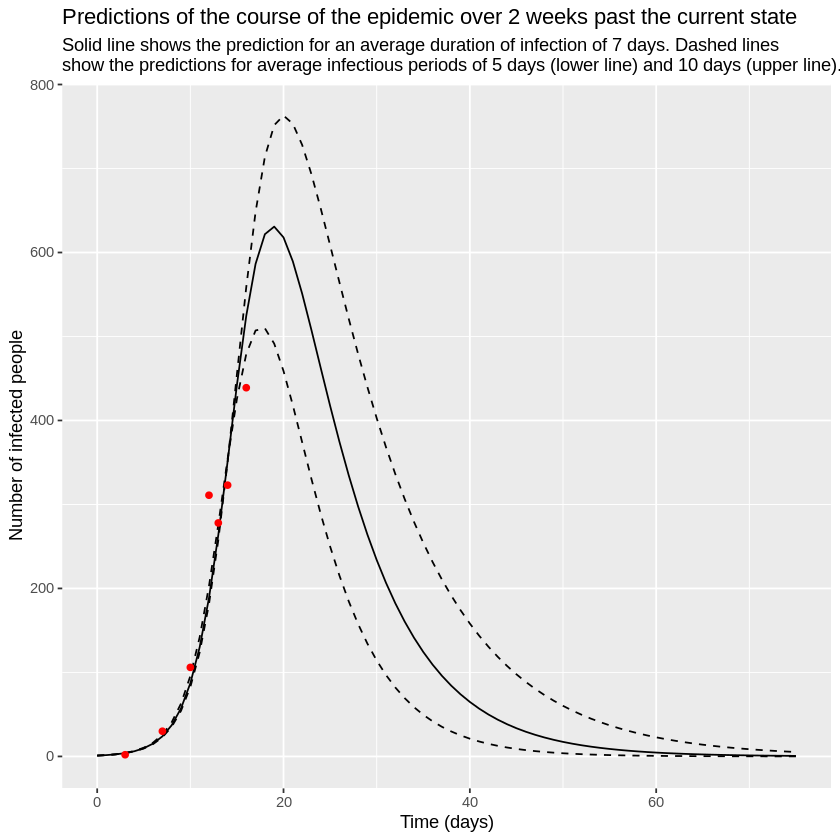

In [3]:
times_pred <- seq(from = 0, to = 75, by = 1)  # predict the course of the epidemic for an additional 2 months

pred1 <- as.data.frame(ode(y = initial_state_values, 
                            times = times_pred, 
                            func = sir_model,
                            parms = parameters1))  # assuming gamma = 1/7 per day

pred2 <- as.data.frame(ode(y = initial_state_values, 
                            times = times_pred, 
                            func = sir_model,
                            parms = parameters2))  # assuming gamma = 1/5 per day

pred3 <- as.data.frame(ode(y = initial_state_values, 
                            times = times_pred, 
                            func = sir_model,
                            parms = parameters3))  # assuming gamma = 1/10 per day

ggplot() +
  geom_line(data = pred1, aes(x = time, y = I)) +                   
  geom_line(data = pred2, aes(x = time, y = I), linetype = 2) + 
  geom_line(data = pred3, aes(x = time, y = I), linetype = 2) +
  geom_point(data = data, aes(x = days, y = number_infected), colour = "red") +   
  xlab("Time (days)")+                                              
  ylab("Number of infected people") +                                 
  labs(title = "Predictions of the course of the epidemic over 2 weeks past the current state",
      subtitle = "Solid line shows the prediction for an average duration of infection of 7 days. Dashed lines
show the predictions for average infectious periods of 5 days (lower line) and 10 days (upper line).")


This plot is a great example of how uncertainty in the input parameters translates into uncertainty in the model ouput. Even though the model output at the beginning of the epidemic looks very similar for all assumptions of the recovery rate (between 0.1 and 0.2 days$^{-1}$) and matches the observed data well, the projections of the course of the epidemic in the future start to diverge. The predicted number of infected people at the peak of the epidemic may be as low as 500 or as high as 750, depending on which value we use for *gamma* in the calibration. Our assumptions regarding the recovery rate equally affect the prediction of the duration of the epidemic. This uncertainty is an unavoidable aspect of making predictions using mathematical models - it is therefore important to investigate and present the uncertainty in predictions, for example when reporting the modelled effect of a vaccine like in the example below.

## Calculating the criticlal vaccination threshold

### What vaccination coverage would you recommend to public health authorities to interrupt transmission?

Remember the formula for calculating the critical vaccination coverage:

\begin{align}
CVT & = 1-\frac{1}{R_0} \\
& = 1-\frac{\gamma}{\beta}
\end{align}

Applying this to our values, we get:
\begin{align}
1-\frac{0.14}{0.6} = 0.77 \\
1-\frac{0.2}{0.67} = 0.70 \\
1-\frac{0.1}{0.55} = 0.82 \\
\end{align}

This shows that it is possible to interrupt transmission (i.e. reduce R<sub>0</sub> below 1) with vaccination, although there is uncertainty about the the precise coverage needed, as a result of uncertainty around the recovery rate $\gamma$. The critical vaccination threshold lies between 70% and 82%, and these estimates can be further refined by better data (more precise estimates) on the recovery rate.